<h1>製造業向け業務プロセス改善DX商材の購入予測 チュートリアル</h1>

<p>
チュートリアルへようこそ!<br>
このチュートリアルでは財務データなどの企業データを分析することで各企業が業務プロセス改善ツールを購入するかどうかの予測を行います。<br>

このチュートリアルでは、予測アルゴリズムの作成を<a href="https://colab.research.google.com/">Google Colaboratory（以降、Colab）</a>上で実装し、提出ファイルを作成するところまでを説明します。<br>
Colabは、ブラウザ上でpythonによるプログラミングができる無料のサービスで、利用にはgoogleアカウントが必要です。<br>
</p>
<p>
チュートリアル終了後も、このコードをベースに精度を改善してみてください。<br>
またこのチュートリアルで使用するNotebookは、「ナレッジ」ページからダウンロード可能です。<br>
たくさんの投稿を心よりお待ちしております！
</p>

<h2>目次</h2>

1. イントロダクション
2. データの理解
3. データ分析
4. モデル構築
5. 提出ファイルを作成しよう
6. 【NextStep】
7. （おまけ①）Scikit-Learnによるモデル構築
8. （おまけ②）【発展】ロジスティック回帰の結果の解釈

# 1.イントロダクション

## 1-1.Colabの使用方法

<p>以下では、Colabの起動からGoogle Drive内のデータ読み込むための準備の手順を説明します。</p>

<h3>Colabの起動</h3>

1. Googleアカウントにログイン
2. ブラウザで <a href="https://colab.research.google.com/">Colab</a> にアクセス
3. 「新しいノートブック」をクリックして、新しいColab環境を立ち上げる

<h3>Google Driveのディレクトリ構成</h3>
<p>
Colabで作成したノートブックは自動的にマイドライブの中の「Colab Notebooks」フォルダに保存されます。<br>
今回はマイドライブの中に、以下のような構造でデータを置くことを前提とします。
</p>

```
マイドライブ/
└── 製造業対抗データインサイトチャレンジ/
     ├──  tutorial.ipynb
     └── data/
          ├── train.csv
          ├── test.csv
          ├── description.csv
          └── sample_submit.csv
```

<h3>Google Driveへの接続方法</h3>

1. Colabノートブックを開いた状態で、以下のコードを実行して自分のGoogle Driveへ接続

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

2. 「Google Driveに接続」をクリックし、Googleアカウントを選択
3. 接続が成功すると、「Mounted at /content/drive」というメッセージが表示される
<p>
これで、自分のGoogle Drive に接続できました!<br>
以下のコードでマイドライブの中にあるフォルダを確認することもできます。
</p>

In [ ]:
# ls /content/drive/MyDrive

<h3>出力保存の設定</h3>

デフォルトではコードを実行した出力は保存されない設定となっているため、それをオフにする。

```
「編集」→「ノートブックの設定」→「このノートブックを保存する際にコードセルの出力を除外する」のチェックを外す
```

## 1-2.ライブラリの読み込み

ライブラリとは様々な便利ツールがまとまったものです。

ライブラリを読み込むことで、pythonがある特定の分野に特化した処理を行うことができるようになります。<br>
データ分析を行うためのライブラリを読み込みましょう。<br>

例えばpandasは、**表形式のデータの処理に特化したライブラリ**で、多くのデータを一括で扱うことが得意です。

他にも様々なライブラリがありますので、気になるものがありましたら、調べるクセをつけておくと良いかもしれません。

まずColabに入っていないライブラリを`pip install`をつかってインストールします。<br>
その後ライブラリを読み込んでいきます。

In [ ]:
# このライブラリはグラフ化する際に日本語を表示させるためのものです。
# これを入れないとグラフ内で日本語が文字化けします。
!pip install japanize-matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

## 1-3.データの読み込み

<p>それではデータを読み込んでみましょう。<br>
データを読み込むには pd.read_csv()を使います。<br>
マイドライブは/content/drive/の中にあるので、trainデータまでのパスは以下のようになります。<br>(もし読み込めない場合は各自の環境に合わせてデータが保存されているパスへ適宜修正してください)</p>

---
**パスの確認方法**<br>
1. 左のファイルタブをクリック
2. 「▶」マークをクリックしていき読み込みたいファイルにカーソルを持っていく
3. 右側の三点リーダーをクリック
4. パスのコピーをクリック
5. パスがコピーされるのでCtrl+vにて貼り付け
---

In [2]:
base_folder = r"C:\Users\mitsu\WORK_DATA_SCIENCE\製造業データインサイトチャレンジ2025/data/"
train = pd.read_csv(base_folder + "train.csv")
test = pd.read_csv(base_folder + "test.csv")

これでデータを読み込むことができました！次章ではどのようなデータがそれぞれに格納されているのかを確認します。

# 2.データの理解

## 1.データの概要を確認してみよう

まずは何を予測するのかを調べます。<br>
まずはカラム情報からターゲット変数の説明を見てみましょう。<br>

| カラム名 | データ | 説明 |
| :--- | :--- | :--- |
| 購入フラグ | Bool | "0＝False（未購入）, 1＝True（購入）" |

今回は企業がDX商品を買うかどうかを０，１で予測する内容です。<br>
０か１で予測値を算出する必要があるので、購入＝1となる確率を算出して、ある閾値以上（例えば0.5）となれば１、それ未満だと０というロジックを設定する必要がありそうです。

次に説明変数のカラム情報を眺めてみてどういうデータかを想像しましょう

-----
企業の基本情報

| カラム名 | データ | 説明 |
| :--- | :--- | :--- |
| 企業名 | テキスト | 企業名称 |
| 企業ID | 数値 | 企業に割り振られた一意のコード |
| 従業員数 | 数値 | 連結従業員数 |
| 業界 | テキスト | 製造、商社、金融、機械、アパレル、エネルギー、IT･･･等 |
| 上場種別 | テキスト | 東証プライム、東証スタンダード、東証グロース |
| 取引形態 | テキスト | BtoB,BtoCなど |
| 会社概要 | テキスト | 会社の事業内容等 |
| 組織図 | テキスト | 階層型組織図(フォーマットは統一されていない) |
| 事業所数 | 数値 | 企業が保有する事務所の数 |
| 工場数 | 数値 | 企業が保有する工場の数 |
| 店舗数 | 数値 | 企業が保有する店舗の数 |

- 企業の基本情報や体制が与えられており、数値のほかにテキストデータが多くある。
- 従業員数が多ければ購入してくれそう

---
企業の財務情報

| カラム名 | データ | 説明 |
| :--- | :--- | :--- |
| 資本金 | 数値 | 貸借対照表科目(直近の年度末決算値)[単位:円] |
| 総資産 | 数値 | 貸借対照表科目(直近の年度末決算値)[単位:円] |
| 流動資産 | 数値 | 貸借対照表科目(直近の年度末決算値)[単位:円] |
| 固定資産 | 数値 | 貸借対照表科目(直近の年度末決算値)[単位:円] |
| 負債 | 数値 | 貸借対照表科目(直近の年度末決算値)[単位:円] |
| 短期借入金 | 数値 | 貸借対照表科目(直近の年度末決算値)[単位:円] |
| 長期借入金 | 数値 | 貸借対照表科目(直近の年度末決算値)[単位:円] |
| 純資産 | 数値 | 貸借対照表科目(直近の年度末決算値)[単位:円] |
| 自己資本 | 数値 | 貸借対照表科目(直近の年度末決算値)[単位:円] |
| 売上 | 数値 | 損益計算書科目(直近の年度末決算値)[単位:円] |
| 営業利益 | 数値 | 損益計算書科目(直近の年度末決算値)[単位:円] |
| 経常利益 | 数値 | 損益計算書科目(直近の年度末決算値)[単位:円] |
| 当期純利益 | 数値 | 損益計算書科目(直近の年度末決算値)[単位:円] |
| 営業CF | 数値 | キャッシュフロー計算書科目(直近の年度末決算値)[単位:円] |
| 税引前当期純利益 | 数値 | キャッシュフロー計算書科目(直近の年度末決算値)[単位:円] |
| 減価償却費 | 数値 | キャッシュフロー計算書科目(直近の年度末決算値)[単位:円] |
| 運転資本変動 | 数値 | キャッシュフロー計算書科目(直近の年度末決算値)[単位:円] |
| その他変動(営業CF) | 数値 | キャッシュフロー計算書科目(直近の年度末決算値)[単位:円] |
| 投資CF | 数値 | キャッシュフロー計算書科目(直近の年度末決算値)[単位:円] |
| 有形固定資産変動 | 数値 | キャッシュフロー計算書科目(直近の年度末決算値)[単位:円] |
| 無形固定資産変動(ソフトウェア関連) | 数値 | キャッシュフロー計算書科目(直近の年度末決算値)[単位:円] |
| 無形固定資産変動(その他) | 数値 | キャッシュフロー計算書科目(直近の年度末決算値)[単位:円] |
| 財務CF | 数値 | キャッシュフロー計算書科目(直近の年度末決算値)[単位:円] |

- 貸借対照表(BS)、損益計算書(PL)、キャッシュフロー計算書(CF)の主な項目がすべて円単位で数値として与えられている。
- DXへの投資は短期目線だけではなく、長期的な目線で投資を行う必要があるので、財務情報は重要そう。

---
企業の声

| カラム名 | データ | 説明 |
| :--- | :--- | :--- |
| アンケート1 | 数値 | 【質問内容】DX推進の戦略的な方向性はどの程度明確ですか？ (1:非常に低い, 2:低い, 3:普通, 4:高い, 5:非常に高い) |
| アンケート2 | 数値 | 【質問内容】社内のDX化に対する満足度はどの程度ですが？(1:非常に低い, 2:低い, 3:普通, 4:高い, 5:非常に高い) |
| アンケート3 | 数値 | 【質問内容】最新デジタル技術(クラウド、AI、IoT等)の導入状況はどの程度進んでいますか？(1:非常に低い, 2:低い, 3:普通, 4:高い, 5:非常に高い) |
| アンケート4 | 数値 | 【質問内容】社内のDX変革に対する抵抗感はどの程度ありますか？(1:非常に低い, 2:低い, 3:普通, 4:高い, 5:非常に高い) |
| アンケート5 | 数値 | 【質問内容】サイバーセキュリティ対策の整備状況はどの程度十分ですか？(1:非常に低い, 2:低い, 3:普通, 4:高い, 5:非常に高い) |
| アンケート6 | 数値 | 【質問内容】すでに業務プロセスの改善や自動化を目的としたツールやサービスを導入していますか？(1:はい, 2:いいえ) |
| アンケート7 | 数値 | 【質問内容】No8が1の場合、既存の業務プロセス改善ツールやサービスに対する満足度はどの程度ですか？(1: 非常に低い, 2:低い, 3: 普通, 4:高い, 5: 非常に高い) |
| アンケート8 | 数値 | 【質問内容】DXプロジェクトの成果や効果はどの程度実感されていますか？(1:非常に低い, 2:低い, 3:普通, 4:高い, 5:非常に高い) |
| アンケート9 | 数値 | 【質問内容】新技術イベントやセミナーへの参加率はどの程度高いですか？(1:非常に低い, 2:低い, 3:普通, 4:高い, 5:非常に高い) |
| アンケート10 | 数値 | 【質問内容】外部パートナー(ベンダー、コンサルタント等)とのDX連携実績はどの程度充実していますか？(1:非常に低い, 2:低い, 3:普通, 4:高い, 5:非常に高い) |
| アンケート11 | 数値 | 【質問内容】DXに関する最新技術やツールの導入状況について、どの程度の情報収集を行っていますか？(1:非常に低い, 2:低い, 3:普通, 4:高い, 5:非常に高い) |
| 今後のDX展望 | テキスト | 【質問内容】御社の今後のDX投資に関する方向性や計画について、ぜひお話をお聞かせいただけますか？ |

- 企業が回答しているDX関連のアンケート。5段階で記載。
 - いずれもDX関連の質問なのですべて購入に影響している可能性があり、一つ一つ確認していく必要がありそう。
- また今後のDX展望に関しては、企業ごとにテキストが与えられている。

## 2.データの中身を確認してみよう

次に訓練用データの中身を確かめてみましょう。

---
**注意！**<br>
以降では入力データのターゲット以外の各列のことを**特徴量**と呼びます。
- 本コンペティションでは、"購入フラグ"以外の列が特徴量です。
---

まず始めの一歩として、表データの中身とサイズを確認しましょう！

---

**(参考)**<br>
Pythonにおいて、値を出力するためには`print()関数`や`display()関数`を使うのが一般的です。<br>一方、Jupyter NotebookやGoogle Colabのような対話的な環境では、セルの最終行に変数や式を記述するだけで、その評価結果が自動的に表示されます。

---

In [3]:
train.head(5)

,企業ID,企業名,従業員数,業界,上場種別,特徴,企業概要,組織図,事業所数,工場数,...,アンケート４,アンケート５,アンケート６,アンケート７,アンケート８,アンケート９,アンケート１０,アンケート１１,今後のDX展望,購入フラグ
0,0,株式会社クロマファクトリー,4539,化学,PR,BtoB,【会社概要】\n\n当社は、化学業界に属し、先進の技術と豊富な実績を背景に、国内外のお客様に...,【経営層】\n├─ 代表取締役社長\n├─ 取締役副社長\n└─ 取締役\n\n【管理本部】...,2.0,10.0,...,1,5,2,NaN,3,4,1,1,弊社は、既存事業基盤を支える先端技術と品質管理体制をさらに磨くため、DX投資を持続可能かつ実...,0
1,1,星浪ホールディングス株式会社,792,運輸・物流,PR,BtoB,当社は運輸・物流業界に属し、792名の従業員と共に、バスや鉄道輸送、物流・海運、不動産・百貨...,経営層\n├─ 経営管理部\n│ ├─ 経営企画室\n│ └─ 財務・人事部\n├─...,2.0,NaN,...,3,4,1,5.0,4,1,2,1,当グループは運輸・物流、不動産・小売、ホテル・文化事業など幅広い事業を抱えるものの、これまで...,0
2,2,株式会社クネットリンク,4346,建設・工事,PR,BtoB,2010年に3社の経営統合により持株会社として設立され、業界3位を誇る電気通信工事会社です。...,経営層\n├─ 経営企画室\n├─ 管理本部\n│ ├─ 人事部\n│ ├─ 財務部\n│ ...,24.0,NaN,...,2,1,1,4.0,4,1,1,2,弊社はこれまで、社内DX導入において業界屈指の前のめり姿勢を貫き、AI・IoT・クラウドなど...,0
3,3,株式会社プリントスフィア,2011,機械,PR,BtoB,"【企業概要】\n当社は、従業員数2,011名を有し、機械業界に属するグローバル企業として、製...",【企業組織図】\n\n■ 経営層\n ├─ 経営企画部\n ├─ 自動認識ソリューション事業...,1.0,NaN,...,5,1,2,NaN,1,2,3,4,当社はこれまで、クラウド、AI、IoT などを活用した製造プロセス・サプライチェーンの効率化...,0
4,4,株式会社悠薫薬品,1488,医療・福祉,PR,BtoB,従業員数：1488人\n業界：医療・福祉業界\n\n事業内容：\n当社は、先発医薬品としての...,────────────────────────────\n【経営層】\n ├─ 代表取締役...,58.0,2.0,...,5,3,1,5.0,2,3,5,4,弊社はこれまで、クラウド、AI、IoT などを計画的に導入し、業務効率化や製品開発の高度化に...,0


全部で43columnsとありますが、上記表では途中でカラムが省略されてしまっているのですべてのカラムを表示できるように設定します。

In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
train.head()

,企業ID,企業名,従業員数,業界,上場種別,特徴,企業概要,組織図,事業所数,工場数,店舗数,資本金,総資産,流動資産,固定資産,負債,短期借入金,長期借入金,純資産,自己資本,売上,営業利益,経常利益,当期純利益,営業CF,減価償却費,運転資本変動,投資CF,有形固定資産変動,無形固定資産変動(ソフトウェア関連),アンケート１,アンケート２,アンケート３,アンケート４,アンケート５,アンケート６,アンケート７,アンケート８,アンケート９,アンケート１０,アンケート１１,今後のDX展望,購入フラグ
0,0,株式会社クロマファクトリー,4539,化学,PR,BtoB,【会社概要】\n\n当社は、化学業界に属し、先進の技術と豊富な実績を背景に、国内外のお客様に...,【経営層】\n├─ 代表取締役社長\n├─ 取締役副社長\n└─ 取締役\n\n【管理本部】...,2.0,10.0,1.0,98364.0,1248827,561053,687774,823447,27116,280605,425380,410697,1093796,45744.0,38858.0,21787,37518,5000,-3000,-30498,-20000,-9498,1,2,1,1,5,2,NaN,3,4,1,1,弊社は、既存事業基盤を支える先端技術と品質管理体制をさらに磨くため、DX投資を持続可能かつ実...,0
1,1,星浪ホールディングス株式会社,792,運輸・物流,PR,BtoB,当社は運輸・物流業界に属し、792名の従業員と共に、バスや鉄道輸送、物流・海運、不動産・百貨...,経営層\n├─ 経営管理部\n│ ├─ 経営企画室\n│ └─ 財務・人事部\n├─...,2.0,NaN,NaN,128400.0,2491660,1024551,1467109,1896755,234541,643605,594905,532729,1671940,88878.0,87169.0,49079,97506,25000,-5000,-52261,-30000,-12261,2,2,1,3,4,1,5.0,4,1,2,1,当グループは運輸・物流、不動産・小売、ホテル・文化事業など幅広い事業を抱えるものの、これまで...,0
2,2,株式会社クネットリンク,4346,建設・工事,PR,BtoB,2010年に3社の経営統合により持株会社として設立され、業界3位を誇る電気通信工事会社です。...,経営層\n├─ 経営企画室\n├─ 管理本部\n│ ├─ 人事部\n│ ├─ 財務部\n│ ...,24.0,NaN,NaN,7143.0,530553,204244,326309,266992,76948,31778,263561,255665,527829,18322.0,19009.0,12775,22154,4000,-500,-38775,-20000,-13775,4,5,1,2,1,1,4.0,4,1,1,2,弊社はこれまで、社内DX導入において業界屈指の前のめり姿勢を貫き、AI・IoT・クラウドなど...,0
3,3,株式会社プリントスフィア,2011,機械,PR,BtoB,"【企業概要】\n当社は、従業員数2,011名を有し、機械業界に属するグローバル企業として、製...",【企業組織図】\n\n■ 経営層\n ├─ 経営企画部\n ├─ 自動認識ソリューション事業...,1.0,NaN,NaN,8510.0,134188,63854,70334,59174,3821,8465,75014,72338,146495,10574.0,9184.0,3663,7735,2000,300,-3550,-1000,-2350,1,4,5,5,1,2,NaN,1,2,3,4,当社はこれまで、クラウド、AI、IoT などを活用した製造プロセス・サプライチェーンの効率化...,0
4,4,株式会社悠薫薬品,1488,医療・福祉,PR,BtoB,従業員数：1488人\n業界：医療・福祉業界\n\n事業内容：\n当社は、先発医薬品としての...,────────────────────────────\n【経営層】\n ├─ 代表取締役...,58.0,2.0,NaN,715.0,181341,111646,69695,47454,10255,447,133887,133372,122831,6112.0,6907.0,5563,8959,500,-300,-3848,-1000,-2848,4,3,5,5,3,1,5.0,2,3,5,4,弊社はこれまで、クラウド、AI、IoT などを計画的に導入し、業務効率化や製品開発の高度化に...,0


すべての列を表示させることができました。<br>
```pd.set_option('display.max_rows', 100)```
を設定すれば表示させる行数の最大数を100に増やすことができます。

次にデータサイズを確認します。

In [6]:
# 学習データと評価データのサイズを確認
print(train.shape, test.shape)

(742, 43) (800, 42)


データ数はそれほど多くなく、エクセルでも展開できそうなデータ量です。

これからデータで気になる点を見ていきたいと思います。<br>
```
1. データ型がどうなっているか、欠損値はあるか
2. テキストデータはどのような構造になっているか
```

### 1.データの型はどうなっているか、欠損値はあるか

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   企業ID                742 non-null    int64  
 1   企業名                 742 non-null    object 
 2   従業員数                742 non-null    int64  
 3   業界                  742 non-null    object 
 4   上場種別                742 non-null    object 
 5   特徴                  740 non-null    object 
 6   企業概要                742 non-null    object 
 7   組織図                 742 non-null    object 
 8   事業所数                726 non-null    float64
 9   工場数                 339 non-null    float64
 10  店舗数                 139 non-null    float64
 11  資本金                 736 non-null    float64
 12  総資産                 742 non-null    int64  
 13  流動資産                742 non-null    int64  
 14  固定資産                742 non-null    int64  
 15  負債                  742 non-null    int64  
 16  短期借入金   

In [ ]:
test.info()

財務データとアンケートは基本数値、会社概要や組織図等の会社情報に関してはobjectであり、テキストデータとなっている。<br>
欠損値は一部の特徴量で確認できる。（工場数、店舗数、資本金、営業利益、経常利益、アンケート7）これらをモデルに組み込む際には適切に処理する必要があることを把握しておきましょう。

### 2.テキストデータはどのような構造になっているか

一部のカラムに上記の```train.head()```では確認しにくい文字列があるため、それぞれどのような構造になっているかをいくつかサンプルを取って確認したいと思います。<br>
具体的には会社概要、組織図、今後のDX展望の3つのカラムのサンプルを確認していきます。

「会社概要」を数サンプル出力してみましょう

In [8]:
print(train.loc[0, "企業名"])
print(train.loc[0, "企業概要"])
print("----------------------------")
print(train.loc[1, "企業名"])
print(train.loc[1, "企業概要"])
print("----------------------------")
print(train.loc[2, "企業名"])
print(train.loc[2, "企業概要"])

株式会社クロマファクトリー
【会社概要】

当社は、化学業界に属し、先進の技術と豊富な実績を背景に、国内外のお客様に高品質な製品とソリューションを提供しています。従業員数は4,539名を超え、専門性の高い技術者と経験豊富なスタッフが連携し、確かな品質管理と迅速な対応で業界をリードしています。

＜事業内容＞
当社は、次の各分野において製造・販売事業を展開しております。

1. インキ事業：
　・食品などの各種パッケージ用インキ
　・オフセット用インキおよび新聞用インキ
　　― 高い発色性と耐候性を実現するインキ類を、最新の技術で開発・製造し、信頼性の高い印刷ソリューションをお届けしています。

2. 包装用接着剤・樹脂事業：
　・包装用接着剤およびポリスチレンの製造・販売
	・コーティング用樹脂、アクリル樹脂、エポキシ樹脂などの製造・販売
　　― 多様なお客様のニーズに応じた製品ラインナップを展開し、加工性や耐久性を追求した素材の開発に注力しています。

3. 顔料・特殊材料事業：
　・有機顔料、ディスプレイ用顔料、化粧品用顔料
　・インクジェット用顔料、液晶材料など各種特殊材料
　　― 精密な色調整と鮮やかな発色を実現する顔料類をはじめ、先端技術を駆使した材料の研究開発を進め、お客様の幅広い用途に対応しております。

これらの事業領域において、当社は技術革新と品質改善を最優先に据え、グローバルな視点で市場の変化に柔軟に対応し続けています。また、環境負荷の低減や安全性の向上にも積極的に取り組むことで、持続可能な社会の実現に寄与しております。
----------------------------
星浪ホールディングス株式会社
当社は運輸・物流業界に属し、792名の従業員と共に、バスや鉄道輸送、物流・海運、不動産・百貨店販売を基盤とし、ホテル・文化事業にも注力するグループ企業です。
----------------------------
株式会社クネットリンク
2010年に3社の経営統合により持株会社として設立され、業界3位を誇る電気通信工事会社です。従業員数は4,346名を超え、建設・工事業界に属し、大手通信事業者をはじめ各種通信会社向けの通信設備建設・保守事業を中心に事業を展開しています。太陽光設備工事およびデータセンターの保守も主要なサービスのひとつであり、

企業の事業内容が少し細かく書かれています。企業によってフォーマットや内容の充実度などは大きく異なっている印象です。

次に「組織図」を数サンプル出力してみましょう

In [9]:
print(train.loc[0, "企業名"])
print(train.loc[0, "組織図"])
print("----------------------------")
print(train.loc[1, "企業名"])
print(train.loc[1, "組織図"])
print("----------------------------")
print(train.loc[2, "企業名"])
print(train.loc[2, "組織図"])

株式会社クロマファクトリー
【経営層】
├─ 代表取締役社長
├─ 取締役副社長
└─ 取締役

【管理本部】
├─ 経営企画部
├─ 財務・総務部
└─ 人事部

【事業本部】
├─ インキ事業部
│ ├─ 研究開発課
│ ├─ 製造課
│ └─ 営業課
├─ 包装用接着剤事業部
│ ├─ 研究開発課
│ ├─ 製造課
│ └─ 営業課
└─ 顔料事業部
  ├─ 研究開発課
  ├─ 製造課
  └─ 営業課

【品質管理部】
├─ 品質保証課
└─ 試験・検査課

【技術サポート部】
└─ 顧客対応課
----------------------------
星浪ホールディングス株式会社
経営層
├─ 経営管理部
│   ├─ 経営企画室
│   └─ 財務・人事部
├─ 輸送事業本部
│   ├─ バス輸送部
│   └─ 鉄道輸送部
├─ 物流・海運事業本部
│   ├─ 物流部
│   └─ 海運部
├─ 不動産・小売事業本部
│   ├─ 不動産部
│   └─ 百貨店販売部
└─ ホテル・文化事業本部
    ├─ ホテル運営部
    └─ 文化事業部
----------------------------
株式会社クネットリンク
経営層
├─ 経営企画室
├─ 管理本部
│ ├─ 人事部
│ ├─ 財務部
│ └─ 総務部
├─ 営業本部
│ ├─ 国内営業部
│ └─ 海外営業部
├─ 技術本部
│ ├─ 設計・開発部
│ ├─ 施工管理部
│ └─ 新技術開発部
└─ 保守・サービス本部
  ├─ 保守管理部
  └─ 顧客サポート部


階層型の組織図になっていることがわかります。

「今後のDX展望」を数サンプル出力してみましょう

In [10]:
print(train.loc[0, "企業名"])
print(train.loc[0, "今後のDX展望"])
print("----------------------------")
print(train.loc[1, "企業名"])
print(train.loc[1, "今後のDX展望"])
print("----------------------------")
print(train.loc[2, "企業名"])
print(train.loc[2, "今後のDX展望"])

株式会社クロマファクトリー
弊社は、既存事業基盤を支える先端技術と品質管理体制をさらに磨くため、DX投資を持続可能かつ実効性重視で進める計画です。これまでの社内DX導入は、サイバーセキュリティ対策や一部部門でのクラウド利用など局所的な取り組みにとどまり、全社レベルでは慎重な姿勢が優勢でした。導入効果の可視化が十分でなかったことや、現場での運用負担への懸念が残っていたことから、推進速度は限定的であり、社内全体で「試しながら学ぶ」段階にあったと言えます。

今後は、こうした経験を踏まえ、従来より一歩踏み込んだ形で全社的なデジタルトランスフォーメーションを段階的に拡大してまいります。投資面では、既存基盤の堅牢化を続けつつ、クラウド、AI、IoTなどの先進技術を業務効率化や収益向上が見込める領域へ選択的に投入し、市場変化への対応力を高める方針です。導入案件は小規模なパイロットから開始し、効果検証を経てスケールさせる段階的アプローチを徹底し、過度な先行投資を避けつつ確実な成果につなげます。

人的リソース面では、デジタルスキルの底上げに向けた教育投資を拡充します。具体的には、既存のeラーニングに加え、外部講師によるハンズオン型ワークショップや、実務と連動したOJTを順次導入します。ただし、技術導入とのバランスを保ち、現場で「使えるスキル」が着実に定着する範囲で推進する考えです。各事業部門の好事例を共有できる横断的なコミュニティを設置し、現場発の改善提案がスムーズに全社へ広がる仕組みも整備します。

さらに、経営企画部と各事業部門が連携し、短期・中期・長期の視点からDX投資ロードマップを策定します。定量指標を用いたモニタリングとPDCAを定期的に実施し、環境変化や事業戦略の見直しに応じて柔軟にアップデートすることで、慎重さと挑戦のバランスが取れた投資体制を構築します。また、外部パートナーやスタートアップとの共創も強化するものの、社内での吸収可能性を見極めながら適切なスピードで進める計画です。

総じて、弊社は従来の強みを生かしつつ、技術革新と組織的学習を両輪に、グローバル市場での競争力向上と業務効率化を図り、着実な成長を実現するためのDX推進に邁進してまいります。
----------------------------
星浪ホールディングス株式会社
当グループは運輸・物流、不

「今後のDX展望」はそれぞれどれくらいの文字量があるか確認してみましょう。

In [11]:
print(len(train.loc[0, "今後のDX展望"]))
print(len(train.loc[1, "今後のDX展望"]))
print(len(train.loc[2, "今後のDX展望"]))

928
883
769


1000文字近い文章量があることがわかります。<br>こういったテキスト情報からどう情報を抽出するかも大事な要素になってきそうです。

# 3.データ分析

## 1.データを眺めて仮説を立ててみよう

データの種類（特徴量）や構造が分かったところで、次は「どのような特徴を持つ企業が購入に至りやすいか」について、自分なりの**「当たり」をつけてみましょう。**（＝仮説）

例えば、以下のような仮説が考えられます。
```
仮説① 従業員数が多い企業は、業務プロセスの効率化による効果が大きいため、購入確率が高いのではないか？

仮説② 利益が大きい企業は、投資する余力があるため、購入確率が高いのではないか？

仮説③ アンケートで「抵抗感がない」と回答した企業は、購入確率が高いのではないか？
```
このように、データやビジネスの知見から導き出す**「仮の答え」が仮説です。**

データ分析を行う上で、分析を始める前に仮説を立てることは非常に重要です。最初に仮説を立てることで、主に2つの大きなメリットがあります。

一つは、**分析の目星がつくため、効率的に分析を進められること。**そしてもう一つは、表面的な数値の動きに惑わされず、**より本質的な因果関係を探求できること**です。

それではこの仮説が正しいのかどうかをデータを使って検証していきましょう。

## 2.仮説があっているかどうか検証してみよう

### 1.仮説一つ一つを検証してみよう


#### 「仮説①：従業員数が多い企業は、業務プロセスの効率化による効果が大きいため、購入確率が高いのではないか？」を検証してみよう


まずは従業員数を可視化してみます<br>
可視化には、matplotlibを使ってヒストグラムを出してみよう

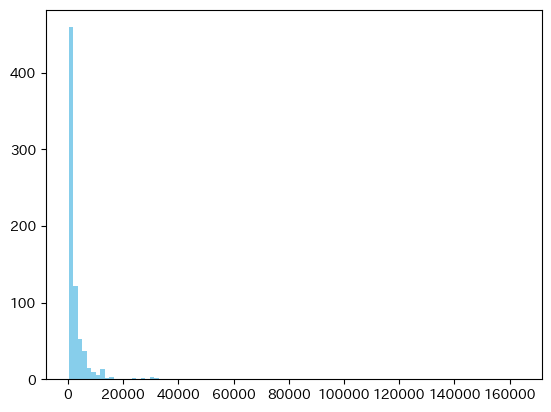

In [12]:
plt.hist(train["従業員数"], bins=100, color='skyblue')
plt.show()

かなり左に寄っていることがわかります。<br>
従業員数が大きい企業がいて、10000人以下の傾向が見えにくいので、10000人以下でグラフを作成してみましょう。

※先ほどはただグラフ化しただけでしたが、今度は見やすくなるようにx軸とy軸にそれぞれ説明を入れてみましょう。

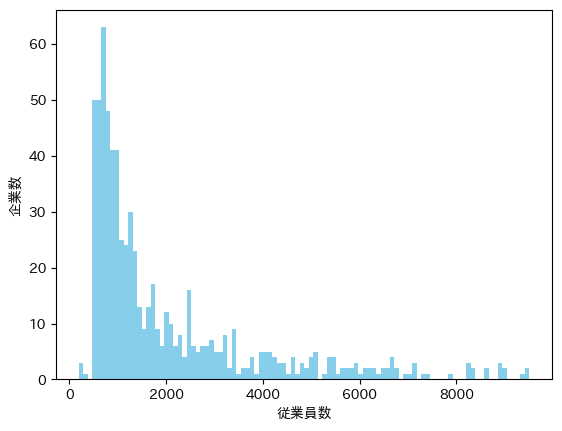

In [13]:
plt.hist(train.loc[train["従業員数"]<10000,"従業員数"], bins=100, color='skyblue')
plt.xlabel('従業員数')
plt.ylabel('企業数')
plt.show()

1000人付近の企業が最も多く右側に裾の長いグラフになっていることがわかります。
<br>

では次に従業員数に応じて購入確率がどう変化しているのかを見ていきます。<br>
方法として、ある範囲の従業員数をもった企業の平均購入確率を算出してみましょう<br>
ここでは、700人以下、700-1000人、1000-2000人、2000-5000人、5000人以上と5つの区分に分けて平均購入割合を出してみたいと思います。<br>
※今度はグラフの上部に数値ラベルも表示させてみます。

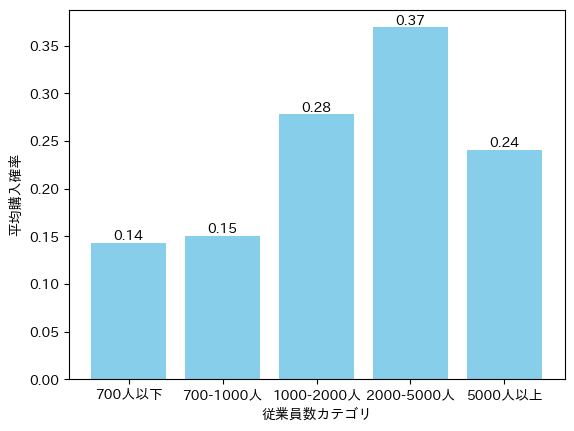

In [14]:
# 従業員数をカテゴリに分類するための区切りとラベルを定義
bins = [0, 700, 1000, 2000, 5000, float('inf')]
labels = ['700人以下', '700-1000人', '1000-2000人', '2000-5000人', '5000人以上']

# pd.cut() を使用して従業員数をカテゴリに分類
train['従業員数カテゴリ'] = pd.cut(train['従業員数'], bins=bins, labels=labels, right=False)

# 従業員数カテゴリごとに購入フラグの平均値を算出
average_purchase_flag = train.groupby('従業員数カテゴリ')['購入フラグ'].mean()

bars = plt.bar(average_purchase_flag.index, average_purchase_flag.values, color='skyblue')
plt.xlabel('従業員数カテゴリ')
plt.ylabel('平均購入確率')

# 各棒の上に数値を表示
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

700-1000人→1000-2000人→2000-5000人と従業員数が増えることで大きく購入確率が上昇していることが確認できます<br>
一方2000-5000人→5000人以下の間で購入確率が大きく減少しています。<br>
<br>
【NextStep】さらなる深堀として、
```
1. 統計検定を使って各カテゴリ間の差が偶然かどうかを調査する
2. 区分を変えてみる
3. ほかの特徴量と組み合わせてみる
```
等を試してみましょう。

####「仮説②：利益が大きい企業は、投資する余力があるため、購入確率が高いのではないか？」を検証してみよう

ここでは当期純利益を見てみます。<br>
仮説①と同様に可視化していきましょう。

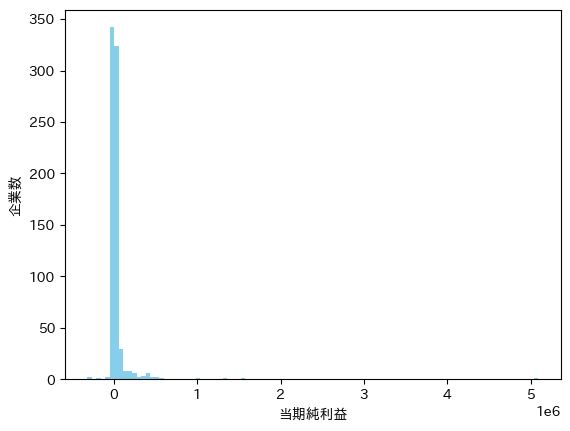

In [15]:
plt.hist(train["当期純利益"], bins=100, color='skyblue')
plt.xlabel('当期純利益')
plt.ylabel('企業数')
plt.show()

見えにくいので、1000億円以下で可視化してみます。

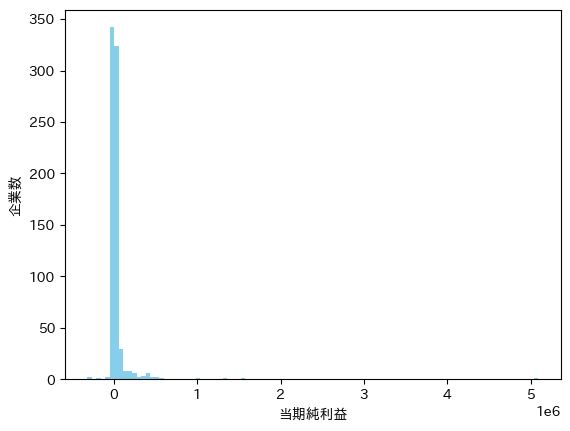

In [16]:
plt.hist(train.loc[train["当期純利益"]<100000000000,"当期純利益"], bins=100, color='skyblue')
plt.xlabel('当期純利益')
plt.ylabel('企業数')
plt.show()

０よりも少し大きいところが最も企業数が多いことがわかります。<br>
マイナスの企業もそれなりにあることがわかりました。<br>
<br>
こちらも仮説①と同様に5つ程度の区分に分けてその区分での購入確率を可視化してみます。<br>
今回は少し方法を変えて、区分内の企業数が同じになるように区分を分けてみようと思います。


当期純利益の区分ごとの購入フラグの平均値:
利益区分
0    0.093960
1    0.175676
2    0.304054
3    0.250000
4    0.382550
Name: 購入フラグ, dtype: float64


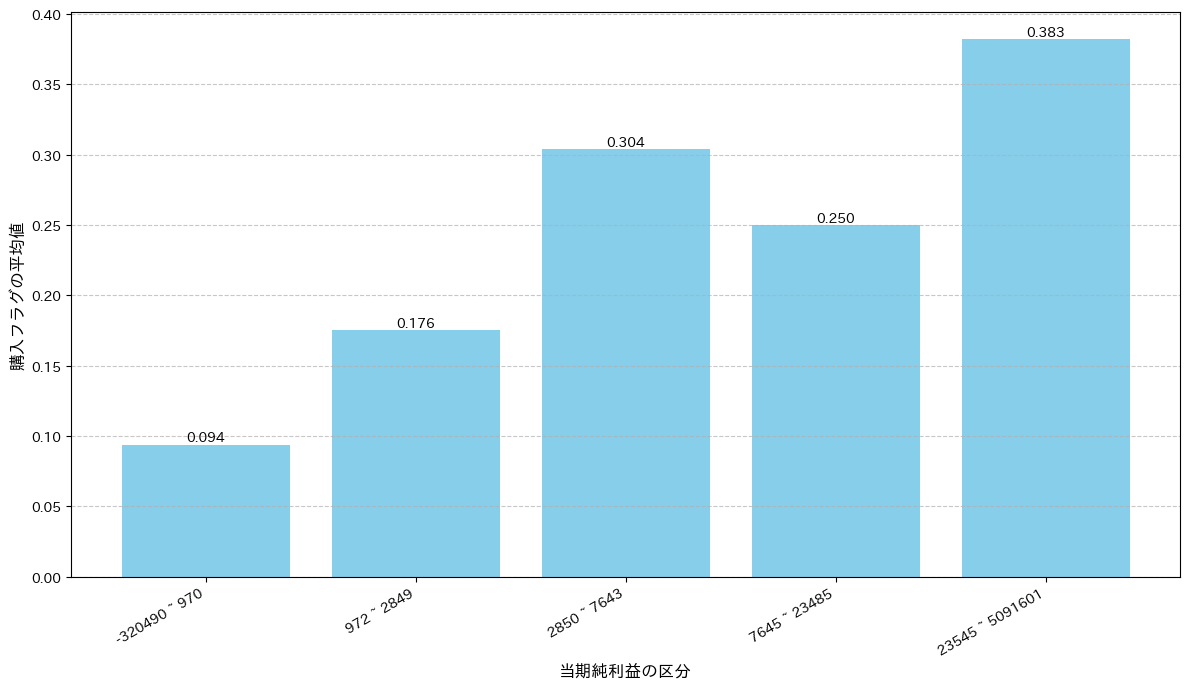

In [17]:
train['利益区分'] = pd.qcut(train['当期純利益'], 5, labels=False)

# 各区分の範囲を確認するために、ラベルを作成します。
category_labels = []
for i in sorted(train['利益区分'].unique()):
    min_val = train[train['利益区分'] == i]['当期純利益'].min()
    max_val = train[train['利益区分'] == i]['当期純利益'].max()
    category_labels.append(f'{min_val} ~ {max_val}')

# 2. 区分ごとの「購入フラグ」の平均値を計算
average_purchase_flag = train.groupby('利益区分')['購入フラグ'].mean()

# 3. 棒グラフの描画
plt.figure(figsize=(12, 7))
bars = plt.bar(category_labels, average_purchase_flag, color='skyblue')

# 4. 数値ラベルを上部に追加
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center') # yvalの上に表示

# グラフの装飾
# plt.title('当期純利益の区分別 購入フラグの平均値', fontsize=16)
plt.xlabel('当期純利益の区分', fontsize=12)
plt.ylabel('購入フラグの平均値', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# # グラフを画像として保存
# plt.savefig('purchase_flag_by_profit_category.png')

# print("グラフを 'purchase_flag_by_profit_category.png' として保存しました。")
print("\n当期純利益の区分ごとの購入フラグの平均値:")
print(average_purchase_flag)

一部購入割合が減少している箇所も見受けられるが、当期純利益が大きいほど購入確率も大きくなっていると言えそう。

---

【NextStep】さらなる深堀として、
```
1. 統計検定を使って各カテゴリ間の差が偶然かどうかを調査する
2. 他の財務指標の傾向を確認してみる
3. 他の財務指標と組み合わせて新しい特徴量を作成する
```
等を試してみましょう。

#### 「仮説③：アンケートで「抵抗感がない」と回答した企業は、購入確率が高いのではないか？」を検証してみよう

これは当然のように思えますが、本当に「抵抗感がない」と回答した企業の購入確率が高くなっているのかをデータにて確認していきます。

まずは、1～5の回答がそれぞれいくつあるかを見ていきます。

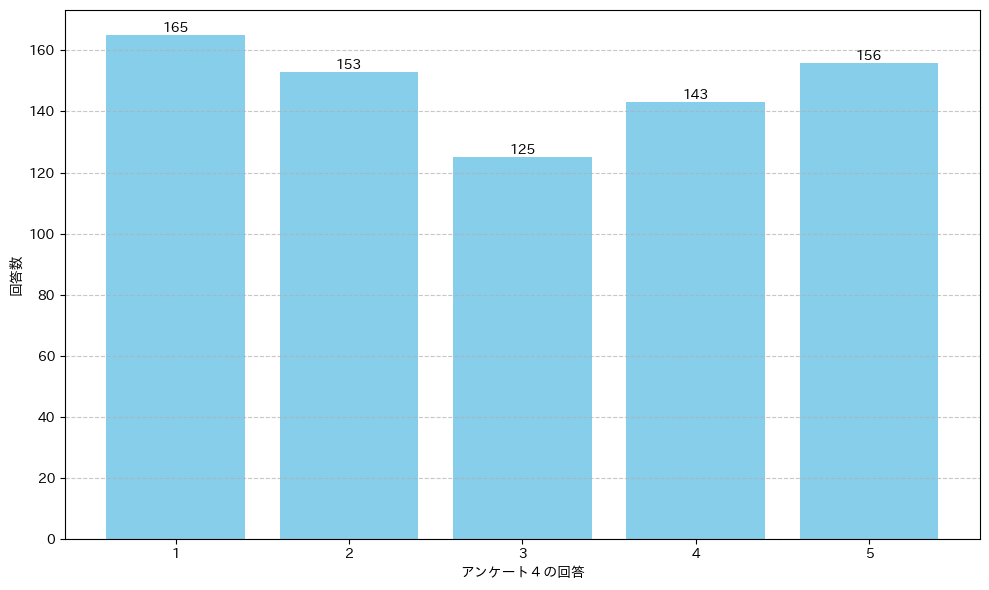

In [18]:
category_counts = train['アンケート４'].value_counts().sort_index()

# グラフのサイズを設定
plt.figure(figsize=(10, 6))

# plt.bar() の戻り値（各棒の情報）を `bars` という変数に格納
bars = plt.bar(category_counts.index, category_counts.values, color='skyblue')

#--- ここからがラベルを追加する処理 ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        x=bar.get_x() + bar.get_width() / 2,  # X座標 (棒の中央)
        y=height,                            # Y座標 (棒の高さ)
        s=f'{height}',                       # 表示するテキスト (整数で表示)
        ha='center',                         # 水平方向の位置揃え (中央)
        va='bottom'                          # 垂直方向の位置揃え (棒の下端に合わせる)
    )
#--- ここまで ---

# グラフの装飾
plt.xlabel('アンケート４の回答')
plt.ylabel('回答数')
plt.xticks(category_counts.index) # X軸の目盛りを整数に保つ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # レイアウトを自動調整

# グラフの表示
plt.show()

1が最も多く、3が少ない。がそこまで極端な差はなさそうです。

ではそれぞれの購入割合を見ていきます。

アンケート４のカテゴリ別 購入フラグの平均値:
アンケート４
1    0.284848
2    0.281046
3    0.304000
4    0.153846
5    0.185897
Name: 購入フラグ, dtype: float64


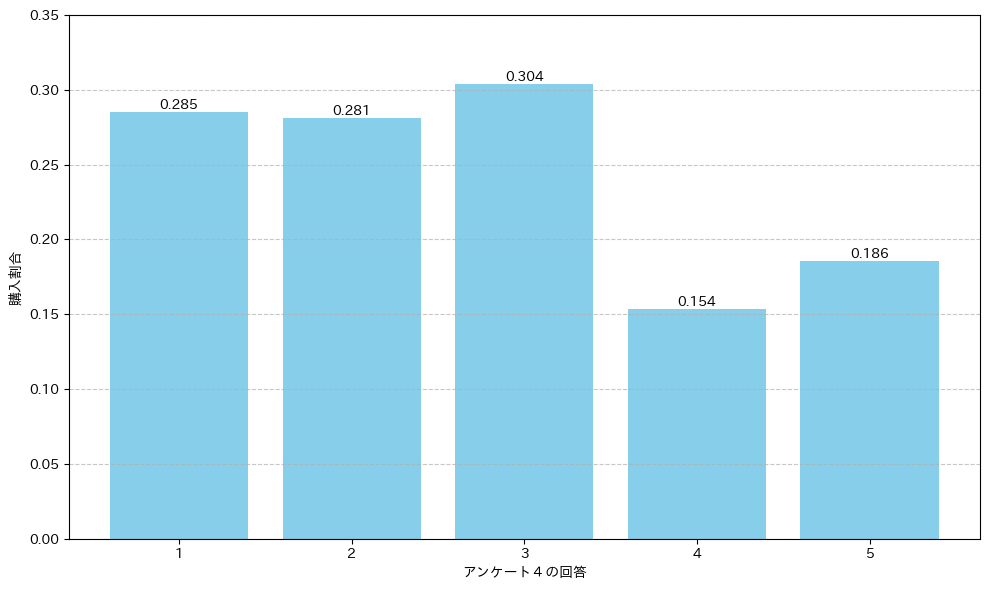

In [19]:
average_purchase_by_survey = train.groupby('アンケート４')['購入フラグ'].mean()

# 2. 計算結果（表）を表示
print("アンケート４のカテゴリ別 購入フラグの平均値:")
print(average_purchase_by_survey)

# 3. 棒グラフを作成
plt.figure(figsize=(10, 6))
bars = plt.bar(average_purchase_by_survey.index, average_purchase_by_survey.values, color='skyblue')

# 4. 各棒の上に数値ラベルを追加
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')

# 5. グラフのタイトルとラベルを設定（日本語表示のエラーを避けるため英語で記述）
# plt.title('Average Purchase Flag by Survey 4 Category')
plt.xlabel('アンケート４の回答')
plt.ylabel('購入割合')
plt.xticks(average_purchase_by_survey.index) # X軸の目盛りをカテゴリ名に設定
plt.ylim(0, 0.35)  # 平均値（購入率）は0から1の範囲
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

３と４の間で購入確率に大きく差があることがわかります。<br>
「抵抗感がない」と購入割合が高くなっていますが、回答1，2，3の間にはほとんど差がありません。<br>
抵抗感が一定を超えた場合に購入確率が低くなるという解釈もできそうです。

---

ではここでは一歩踏み込んで見た目ではなく、統計的に３と４の間に差があるのかどうかを検証してみましょう。<br>
これは統計検定といい、今ある差が偶然発生しているものかどうかを調べる際に使用します。<br>
Pythonで統計検定を実施するにはいくつか方法がありますが、今回はstatsmodelsというライブラリを用いて母比率の差の片側検定を実施してみましょう。<br>
要するに、アンケート４に対して「4」と回答した企業の購入割合より、「3」と回答した企業の購入割合の方が統計的に大きいと言える？ということを確認するための検定です。

In [21]:
from statsmodels.stats.proportion import proportions_ztest

# グループ3とグループ4のデータに分割
group3 = train[train['アンケート４'] == 3]
group4 = train[train['アンケート４'] == 4]

# 各グループの購入数（成功数）を計算
count_3 = group3['購入フラグ'].sum()
count_4 = group4['購入フラグ'].sum()

# 各グループのサンプルサイズ（観測数）を計算
nobs_3 = len(group3)
nobs_4 = len(group4)

# 検定に必要なリストを作成
# `proportions_ztest`はリストの1番目の要素が2番目より大きいかを検定するため、
# グループ3のデータを先に記述します。
counts = np.array([count_3, count_4])
nobs = np.array([nobs_3, nobs_4])

# 母比率の差の検定を実行 (片側検定)
# alternative='larger' は、1番目の比率 > 2番目の比率 を対立仮説とする
z_stat, p_value = proportions_ztest(count=counts, nobs=nobs, alternative='larger')

print("--- 片側検定（グループ3の購入率 > グループ4の購入率）---")
print(f"グループ3: 購入数 = {count_3}, 全体数 = {nobs_3}, 購入率 = {count_3/nobs_3:.4f}")
print(f"グループ4: 購入数 = {count_4}, 全体数 = {nobs_4}, 購入率 = {count_4/nobs_4:.4f}")
print("\n--- 検定結果 ---")
print(f"Z統計量: {z_stat:.4f}")
print(f"P値: {p_value:.4f}")

# 結果の判定
alpha = 0.05
if p_value < alpha:
    print(f"\nP値 ({p_value:.4f}) < 有意水準 ({alpha})")
    print("結論: 帰無仮説は棄却され、アンケート4の回答「3」の購入率はアンケート4の回答「4」の購入率よりも統計的に有意に大きいと言えます。")
else:
    print(f"\nP値 ({p_value:.4f}) >= 有意水準 ({alpha})")
    print("結論: アンケート4の回答「3」と「4」のグループ間で購入フラグの平均値に統計的な有意差があるとは言えません。")

--- 片側検定（グループ3の購入率 > グループ4の購入率）---
グループ3: 購入数 = 38, 全体数 = 125, 購入率 = 0.3040
グループ4: 購入数 = 22, 全体数 = 143, 購入率 = 0.1538

--- 検定結果 ---
Z統計量: 2.9418
P値: 0.0016

P値 (0.0016) < 有意水準 (0.05)
結論: 帰無仮説は棄却され、アンケート4の回答「3」の購入率はアンケート4の回答「4」の購入率よりも統計的に有意に大きいと言えます。


これでアンケート４に対し「３」と回答した企業は「４」と回答した企業よりも購入確率が高いということがわかりました。

---

**P値と有意水準の解釈**

p値を簡潔に説明すると、

**「もし比較するグループ間に本当は差がない、と仮定した場合に、今回の結果が偶然起こる確率」**

のことです。

この例で言えば、「2つのグループの母比率に本当は差がないと仮定した場合に、今回観測されたような0.14という比率の差(0.3040-0.1678)、またはそれ以上に大きな差が偶然生まれてしまう確率」が0.0042だ、ということを表しています。

そして、有意水準を0.05と設定するのは、「確率が5%を下回るような珍しいことは、偶然起こったとは考えづらいよね」という判断基準（ボーダーライン）を決めている、ということになります。


---

【NextStep】さらなる深堀として、
```
1. ほかのアンケートではどのような傾向になっているか調査する
2. アンケート結果からどういう企業が購入確率が高くなっているかを解釈してみる
```
等を試してみましょう。

# 4.モデル構築

### 1.上記検証結果を使ってロジスティック回帰モデルを構築して予測してみよう

以上で仮説の検証を一通り終えたら、その特徴量を使用してモデルを作成していきます。<br>先ほど使用したライブラリstatsmodelsを使ってロジスティック回帰を実装していきたいと思います。<br>
ここでは簡単に先ほど検証した特徴量３つ[従業員数、当期純利益、アンケート４]をそのままモデルに入れて学習させ予測してみたいと思います。

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import f1_score

# 前処理
target = '購入フラグ'
numerical_features = ['従業員数', '当期純利益', 'アンケート４']


# --- 学習データの前処理 ---
X_train = train[numerical_features]
y_train = train[target]

# --- テストデータの前処理 ---
X_test = test[numerical_features]

# statsmodelsのために定数項(切片)を追加
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# ロジスティック回帰モデルの学習
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit(disp=0) # disp=0 は収束計算の途中経過を非表示にする

# 予測及び閾値で変換
y_train_pred_prob = result.predict(X_train)
y_train_pred = (y_train_pred_prob > 0.5).astype(int) # 確率0.5を閾値として0/1に変換
y_test_pred_prob = result.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int) # 確率0.5を閾値として0/1に変換

# F1スコアで評価
f1 = f1_score(y_train, y_train_pred)

# 結果の出力
print("--- ロジスティック回帰モデルのサマリー ---")
print(result.summary())
print("\n" + "="*80 + "\n")
print("--- モデルの評価 ---")
print(f"TRAINデータに対するF1スコア: {f1:.4f}")

--- ロジスティック回帰モデルのサマリー ---
                           Logit Regression Results                           
Dep. Variable:                  購入フラグ   No. Observations:                  742
Model:                          Logit   Df Residuals:                      738
Method:                           MLE   Df Model:                            3
Date:                Fri, 31 Oct 2025   Pseudo R-squ.:                 0.05139
Time:                        16:19:58   Log-Likelihood:                -388.89
converged:                       True   LL-Null:                       -409.96
Covariance Type:            nonrobust   LLR p-value:                 3.759e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7270      0.195     -3.723      0.000      -1.110      -0.344
従業員数       -1.786e-05   1.48e-05     -1.206      0.228   -4.69e-05    1.12e-05
当期純利益       5.882e-06   1.

## 4.2.評価指標を理解しよう

Trainデータでの今コンペの評価指標であるF1スコアは0.14となっています。<br>
ではF1スコアとはどのような評価指標なのでしょうか。<br>
以下、簡単に見ていきたいと思います。

---

＜F1スコアの計算方法＞

まず、予測結果をもとに混合行列を作成します。

| | 予測：陽性 | 予測：陰性 |
| :--- | :---: | :---: |
| 実績：陽性 | TP | FN |
| 実績：陰性 | FP | TN |

<br>

次に、表の「縦」と「横」を見ます。

  * 適合率 ＝ 縦で見る `TP / (TP+FP)`

      * 「陽性」と予測した列の正解率。

  * 再現率 ＝ 横で見る `TP / (TP+FN)`

      * 「陽性」だった行をどれだけ網羅できたか。

<br>

最後に、F1スコアを計算します。

$$F1スコア = 2 \times \frac{\text{適合率} \times \text{再現率}}{\text{適合率} + \text{再現率}}$$

要するに、F1スコアとは、混合行列における「縦の正解率（適合率）」と「横の網羅率（再現率）」を、バランス良く1つの数値で評価したものです。<br>
ゆえに、適合率、再現率のどちらか一方が高くても一方が低ければF1スコアは低くなります。これを意識したうえで先ほどの結果を考察してみましょう。

---

それでは、まず混合行列を作っていきます。<br>
混合行列にはsklearnのconfusion_matrixを使うのが便利です。

--- 混合行列 ---
[[558   5]
 [165  14]]




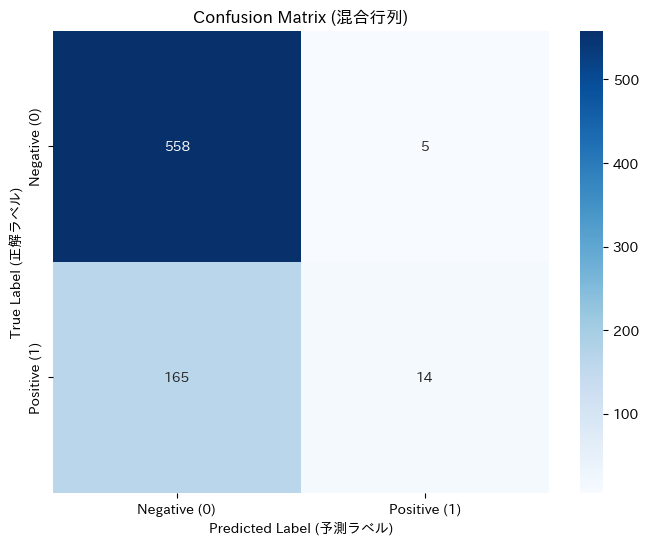

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_train_pred)

print("--- 混合行列 ---")
print(cm)
print("\n")


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted Label (予測ラベル)')
plt.ylabel('True Label (正解ラベル)')
plt.title('Confusion Matrix (混合行列)')
plt.show()

予測値が0によりすぎていることがわかります。（このモデルでは0と1を分ける閾値が0.5よりも小さい可能性あることを示しています。後述）<br>
では、適合率と再現率、およびF1スコアを算出してみましょう。

In [24]:
# 適合率 (Precision): 陽性と予測した中で、実際に陽性だった割合
precision = precision_score(y_train, y_train_pred)

# 再現率 (Recall): 実際の陽性のうち、正しく陽性と予測できた割合
recall = recall_score(y_train, y_train_pred)

# F1スコア: 適合率と再現率の調和平均
f1 = f1_score(y_train, y_train_pred)

print("--- 各種評価指標 ---")
print(f"適合率 (Precision): {precision:.4f}")
print(f"再現率 (Recall):    {recall:.4f}")
print(f"F1スコア (F1 Score): {f1:.4f}")
print("\n")

--- 各種評価指標 ---
適合率 (Precision): 0.7368
再現率 (Recall):    0.0782
F1スコア (F1 Score): 0.1414




適合率と再現率を確認すると適合率は高いにもかかわらず、再現率が異常に低く、そのためF1スコアが低くなっていることがわかります。<br>
F1スコアは適合率、再現率のバランスが求められていることがわかります。

これを補正してみましょう。<br>
ロジスティック回帰の出力は確率となっており、現状その確率が0.5より大きいならば1、0.5以下であれば0とするようになっています。(下記の部分です。)<br>
```
# 予測及び閾値で変換
y_train_pred_prob = result.predict(X_train)
y_train_pred = (y_train_pred_prob > 0.5).astype(int) # 確率0.5を閾値として0/1に変換
y_test_pred_prob = result.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int) # 確率0.5を閾値として0/1に変換
```
適合率が高く、再現率が低いということは、予測が間違えて0となってしまっているのが多いということになります。(混合行列の左下部分)<br>
よって1の割合が増えるように0.5の閾値を小さくして予測値の変化を見てみましょう。

In [25]:
## 使いまわしたいので閾値を変えて適合率と再現率を算出して出力するコードを関数化します。

def calc_metrics(thres, pred_prob, trues):
    pred = (y_train_pred_prob > thres).astype(int) # 確率thresを閾値として0/1に変換

    # 適合率 (Precision): 陽性と予測した中で、実際に陽性だった割合
    precision = precision_score(trues, pred)

    # 再現率 (Recall): 実際の陽性のうち、正しく陽性と予測できた割合
    recall = recall_score(trues, pred)

    # F1スコア: 適合率と再現率の調和平均
    f1 = f1_score(trues, pred)

    print("--- 各種評価指標 ---")
    print(f"適合率 (Precision): {precision:.4f}")
    print(f"再現率 (Recall):    {recall:.4f}")
    print(f"F1スコア (F1 Score): {f1:.4f}")
    print("\n")

    return precision, recall, f1

In [26]:
precision_list = []
recall_list = []
f1_list = []
thres_list = [0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
for i in thres_list:
    print("閾値：",i)
    precision, recall, f1 = calc_metrics(i, y_train_pred_prob, y_train)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

閾値： 0.4
--- 各種評価指標 ---
適合率 (Precision): 0.6452
再現率 (Recall):    0.1117
F1スコア (F1 Score): 0.1905


閾値： 0.35
--- 各種評価指標 ---
適合率 (Precision): 0.5854
再現率 (Recall):    0.1341
F1スコア (F1 Score): 0.2182


閾値： 0.3
--- 各種評価指標 ---
適合率 (Precision): 0.4714
再現率 (Recall):    0.1844
F1スコア (F1 Score): 0.2651


閾値： 0.25
--- 各種評価指標 ---
適合率 (Precision): 0.3132
再現率 (Recall):    0.4637
F1スコア (F1 Score): 0.3739


閾値： 0.2
--- 各種評価指標 ---
適合率 (Precision): 0.2936
再現率 (Recall):    0.7709
F1スコア (F1 Score): 0.4253


閾値： 0.15
--- 各種評価指標 ---
適合率 (Precision): 0.2452
再現率 (Recall):    0.9944
F1スコア (F1 Score): 0.3934


閾値： 0.1
--- 各種評価指標 ---
適合率 (Precision): 0.2432
再現率 (Recall):    1.0000
F1スコア (F1 Score): 0.3913




数字の羅列では少しわかりにくいので上記出力を適合率と再現率、F1スコアの関係がわかりやすくなるようにグラフ化してみようと思います。

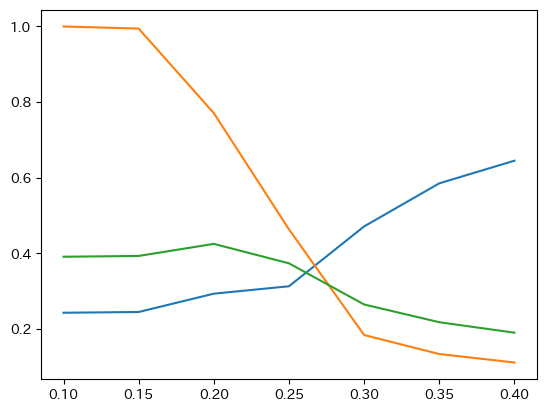

In [27]:
plt.plot(thres_list, precision_list, label='Precision')
plt.plot(thres_list, recall_list, label='Recall')
plt.plot(thres_list, f1_list, label='F1 Score')
plt.show()

とりあえずもっとも簡単に可視化をしてみました。<br>
ただ、見やすいグラフを細かくコードで設定するのは中々大変で難しいです。<br>
そこでここでは少しお試しの要素も加えて、**生成AI**を使って、F1スコア、適合度、再現率をきれいにグラフ化するPythonコードを書いてもらってみましょう。今回は$GPT-5$を使ってみました。<br>
さてどんなグラフができるでしょうか。<br>

---

**入力プロンプト**<br>
```
下記Pythonコードを、F1スコアを目立たせて、適合率と再現率を補完的に見せるコードにしてください

#コード
plt.plot(thres_list, precision_list, label='Precision')
plt.plot(thres_list, recall_list, label='Recall')
plt.plot(thres_list, f1_list, label='F1 Score')
plt.show()
```

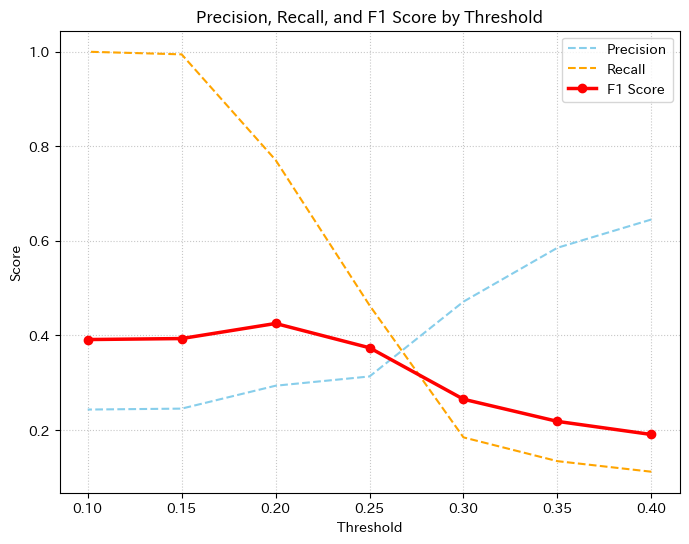

In [28]:
# 以下がGPT-5からの出力となります。

plt.figure(figsize=(8, 6))

# PrecisionとRecallは補助的に（薄めの線＆点線）
plt.plot(thres_list, precision_list, linestyle='--', color='skyblue', linewidth=1.5, label='Precision')
plt.plot(thres_list, recall_list, linestyle='--', color='orange', linewidth=1.5, label='Recall')

# F1スコアは目立たせる（太線＆濃い色）
plt.plot(thres_list, f1_list, color='red', linewidth=2.5, label='F1 Score', marker='o')

# 軸ラベルとタイトル
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score by Threshold')

# グリッドと凡例
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()

plt.show()

きれいにわかりやすく装飾してくれましたね。<br>
私は何もいじらずに生成されたコードをそのまま実行しただけです。<br>
実際このチュートリアルのコードも適切に指示をすればすべて生成AIで作成することもできます。<br>これを機会にぜひ生成AIを使いこなせるようになってみましょう。<br>
生成AI恐るべしですね。

試した結果としては、閾値が**$0.2$**の時が最もF1スコアが高くなることがわかりました。<br>

---

**注意！**<br>
この閾値はモデルによって変動しますし、Trainでの最適な閾値がTestでも最適な閾値となるとは限らないことに注意してください。

---

では閾値を**$0.2$**とした場合の混合行列がどうなっているかを見てみましょう。

--- 混合行列 ---
[[231 332]
 [ 41 138]]




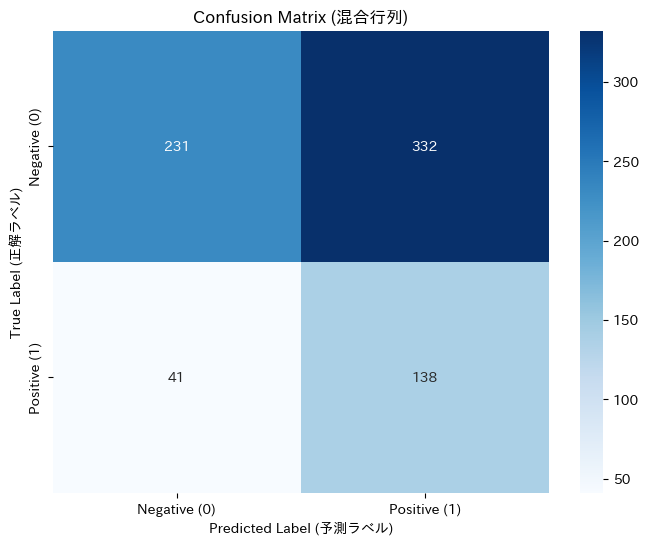

In [29]:
y_train_pred_modi = (y_train_pred_prob > 0.2).astype(int) # 確率0.2を閾値として0/1に変換

cm = confusion_matrix(y_train, y_train_pred_modi)

print("--- 混合行列 ---")
print(cm)
print("\n")


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted Label (予測ラベル)')
plt.ylabel('True Label (正解ラベル)')
plt.title('Confusion Matrix (混合行列)')
plt.show()

今度は少し予測が１によりすぎている気もしますが、この場合が最もF1スコアが高かったのでここでは、この結果0.2を閾値として使ってTestデータの予測値も変更します。

In [ ]:
y_test_pred_modi = (y_test_pred_prob > 0.2).astype(int) # 確率0.2を閾値として0/1に変換

In [ ]:
y_test_pred.sum(), y_test_pred_modi.sum()

閾値を0.5→0.2にすることで、予測が１の数が大幅に増加しました。

## 5.提出ファイルを作成しよう

では最後に提出ファイルを作成します!

どのように提出ファイルを作れば良いかわからない方もいるとは思いますが、コンペティションページにサンプルの投稿ファイルがありますので、こちらを利用して、予測結果を提出しましょう!

sample_submit.csvを読み込み、予測部分を今回作成した予測値に変更しましょう!

そして提出ファイルを保存しましょう!

In [ ]:
## まずsample_submit.csvを読み込みましょう。
sample_submit = pd.read_csv(base_folder + "sample_submit.csv", header=None)

In [ ]:
sample_submit

企業コードはtest.csvファイルの並びと同じになっているので、先ほど予測したy_test_pred_modiを購入フラグの列に置き換えます。

In [ ]:
sample_submit.iloc[:, 1] = y_test_pred_modi

In [ ]:
sample_submit

これをcsvファイルとして保存します。

In [ ]:
## ファイルを保存しましょう。
sample_submit.to_csv(base_folder + "submission.csv", index=False, header=None)

この保存した「submission.csv」ファイルをコンペページの「提出する」からアップロードして提出すれば完了です！

## 6.【NextStep】

お疲れ様でした！<br>
このチュートリアルにおいては分析→予測→保存までの基本的な流れを解説しました。<br>
他にもさまざまなアプローチや手法があります。その一部を下記に上げましたのでぜひ挑戦してみてください。

- いろんな特徴量を試してみよう
 - 今回3つの仮説から3つの特徴量のみを使ったモデルを構築したが、他にもさまざまな仮説を立て、最適なモデルを作り上げよう
 - また様々な特徴量を組み合わせも試してみよう
- いろんなモデルを試してみよう
 - 今回はBasicな統計モデルであるロジスティック回帰を使用したが、ほかにも、SVMや決定木、RandomForest、LightGBM、ニューラルネットワーク等、様々なモデルを試してみよう。
- テキストを分析してみよう
 - 今回のデータにはテキスト特徴量が数か所存在する。
 - テキストの分析の難易度は高いが様々な手法があるため調査してぜひ試してみよう
- 生成AIを活用してみよう
 - 生成AIを使ってアイデアだしからコード作成、特徴量生成、予測補助等、使い方は無限にあります。
 - 今後の業務に活かすためにもぜひ活用してデータ分析を効率化してみましょう

# 7. (おまけ①)Scikit-learnによるモデル構築

先ほどはstatsmodelsというライブラリを用いてロジスティック回帰を予測しました<br>
statsmodelsは統計的な分析を実施する際には、p値やzスコアなどが確認できてとても便利ですが、【NextStep】で上げた決定木やRandomForest、SVMなどを実装することができません。<br>
そこでここでは上記手法含めロジスティック回帰や線形回帰も実装が可能であるライブラリsklearnをご紹介いたします。

「4.モデルの構築」で実装したコード（statsmodelsを使用したロジスティック回帰）をsklearnを使ったロジスティック回帰に変えると以下のようになります。

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

# ------------------ 基本設定 ------------------
target = '購入フラグ'
numerical_features = ['従業員数', '当期純利益', 'アンケート４']

# --- データ取り出し ---
X_train = train[numerical_features]
y_train = train[target]

X_test  = test[numerical_features]

# ------------------ ① 標準化 ------------------
scaler = StandardScaler()

# 学習データで平均・標準偏差を計算し、そのまま変換
X_train_std = scaler.fit_transform(X_train)

# fit で得た平均・標準偏差を使ってテストデータを変換
X_test_std  = scaler.transform(X_test)

# ------------------ ② ロジスティック回帰 ------------------
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# 学習
model.fit(X_train_std, y_train)

# 予測
y_train_pred = model.predict(X_train_std)
y_test_pred  = model.predict(X_test_std)

# ------------------ ③ 評価 ------------------
train_f1 = f1_score(y_train, y_train_pred)

print('--- モデルの評価 ---')
print(f'TRAINデータ F1スコア: {train_f1:.4f}')

# ------------------ ④ 係数の確認 ------------------
coef = pd.Series(model.coef_[0], index=numerical_features)
print('\n--- 推定された係数 ---')
print(coef.to_string(float_format=lambda x: f'{x: .4f}'))
print(f'\n切片（intercept）: {model.intercept_[0]:.4f}')


--- モデルの評価 ---
TRAINデータ F1スコア: 0.1421

--- 推定された係数 ---
従業員数     -0.1713
当期純利益     1.1669
アンケート４   -0.2744

切片（intercept）: -1.1513


---

**注意！**
- 標準化の実施が推奨される
 - `sklearn` の場合、デフォルトで正則化（過学習を防ぐためのペナルティ）が適用されます。データセットの特徴量間でスケールが大きく異なると、このペナルティが不均等にかかり、モデルが適切に学習できない可能性があるため、標準化を行います。
- p値やz値は計算されない。
 - `statsmodels`と異なりロジスティック回帰や線形回帰の場合は、p値やz値が計算されないため、特徴量毎の有意性を見ることはできない。
- `model.predict()`は0，1を返す
 - `model.predict()`は閾値を0.5とした場合の0,1が返ってくる。確率を出して閾値を調整したい場合などは`model.predict_proba()`を使用する。
---

**sklearn を使うことの利点**

> sklearn の分類モデルは共通の API（`fit`・`predict` など）を持っており、同じインターフェースで利用できます。そのため、`LogisticRegression` を決定木や SVM、ランダムフォレストなど別のモデルに置き換える場合でも、学習・予測のコードはほとんど変更する必要がありません。この統一された設計により、異なるアルゴリズムを容易に比較・検証できるのが sklearn の大きな利点です。

In [ ]:
model.predict_proba(X_train_std)

# 8. (おまけ②)【発展】ロジスティック回帰の結果の解釈

## 1.ロジスティック回帰の結果を解釈してみよう

`statsmodels`によって出力されたサマリーデータは、データの特徴を分析する上で非常に役に立ちます。<br>これらの結果からどう解釈できるのかを見ていきましょう。<br>
まず、もう一度ロジスティック回帰の結果のサマリーを見てみましょう。

In [ ]:
print(result.summary())

**`coef`**（係数）は、その特徴量が1単位増加したときに**「対数オッズ（log-odds:log(π/(1-π)）」**がどれだけ変化するかを示しています。<br>
要するにその特徴量がターゲットに与える効果の大きさを表します。

この対数オッズの変化量 `coef` を指数変換（`np.exp()`）することで、**「オッズ」が何倍になるか（=オッズ比）**を計算できます。

「アンケート４」の場合、係数が `-0.1847` なので、オッズ比は `np.exp(-0.1847) ≒ 0.83` となります。

これは、**「他の特徴量が一定の条件下で、アンケート４の回答が1つ増える（例: 3→4、2→3）ごとに、ある事象が起こる（購入確率）オッズが約0.83倍になる（=約17%減少する）」**ことを意味します。<br>

オッズが0.83倍になるということによる確率$π$への影響を試算してみます。

$$
\frac{p_{\text{after}}}{1 - p_{\text{after}}} = 0.83 \times \frac{p_{\text{before}}}{1 - p_{\text{before}}}
$$

例えば、$p_{\text{before}}$が0.5だった場合、$p_{\text{after}}$は約0.45となります。（※元の確率$p_{\text{before}}$がいくつかによって変動幅は変わります。）

>＜オッズ＞<br>
確率が「全体のうち、その事象が起こる割合」を示すのに対し、オッズは「失敗に対する成功の比率」を示す。

>＜オッズの計算式＞
ある事象が起こる確率を $π$ とすると、オッズは以下の式で計算できます。
$$\text{オッズ} = \frac{π}{1-π} = \frac{\text{起こる確率}}{\text{起こらない確率}}$$
* オッズの値は、0から無限大（∞）の範囲をとります。
* オッズが1のとき、起こる確率と起こらない確率は等しくなります（$π$＝0.5のとき）。

---

**`P>|z|`**はP値を表します。この値は、「もし係数（coef）が0である（変数がターゲットに影響しない）」という帰無仮説が正しいと仮定した場合に、観測された結果が偶然得られる確率を示しています。

このP値を見ると、「当期純利益」と「アンケート４」は有意水準5%（0.05）を十分に下回っており、統計的に有意であると言えます。これは「係数が0である」という帰無仮説を棄却できるだけの根拠があることを意味し、これらの変数はターゲットに影響を与えていると結論付けられます。

一方で、「従業員数」のP値は約0.2と大きく、有意水準0.05を上回っています。そのため、「係数が0である」という帰無仮説を棄却できません。これは、従業員数がターゲットに影響を与えているとは統計的に言えない、ということを意味します。

---

**モデル構築における注意点：変数の有意性は「組み合わせ」で変化する**

- はじめに：単一モデルのP値は「暫定的な評価」に過ぎない

 - 現在のモデルで算出されたP値は、あくまで「現在投入されている特徴量の組み合わせにおける」暫定的な評価です。この結果だけを見て「P値が大きいから、この変数は不要だ」と結論付けてしまうのは、データに隠された本質的な関係性を見誤るリスクを伴います。

 - 安易な変数の除外は、モデルの予測精度を低下させたり、誤った示唆を導き出したりする原因となるため、慎重な判断が求められます。

- なぜ変数を加えるとP値が変わるのか？：そのメカニズム

 - 変数の有意性がモデルの組み合わせによって変化する背景には、主に以下のような統計的な現象が存在します。

 - **シナリオ①：他の変数に「隠された」本来の効果が明らかになる（抑制効果）**

   - ある変数の効果が、別の変数のノイズによって打ち消され、見かけ上「有意でない」と表示されるケースです。

   * **具体例：** 「学習時間」が「テストの点数」に与える影響を分析したいとします。
    * **モデル1：`点数 ～ 学習時間`** → P値が大きく、有意にならなかった。「学習時間は点数に関係ないのか？」と一見思えます。
    * **背景：** ここに「不安度の高さ」という変数が隠れていると仮定します。「不安度が高い」学生は、たくさん勉強する傾向がある（学習時間↑）一方で、本番で実力を発揮できず点数が下がる（点数↓）かもしれません。この「不安度」の存在が、「学習時間」が本来持つプラスの効果を打ち消してしまっているのです。
    * **モデル2：`点数 ～ 学習時間 + 不安度`** → この「不安度」という変数をモデルに加えることで、その影響が統計的に分離（統制）されます。その結果、ノイズが取り除かれ、「学習時間」が持つ純粋なプラスの効果が明らかになり、P値が小さく（有意に）なることがあります。

  - **シナリオ②：見かけ上の関係性が、より本質的な要因に置き換わる（交絡）**

   - 2つの変数が共に、第3の変数と関連している場合、それらの間には見かけ上の相関が生まれます。

    * **具体例：** 「アイスクリームの売上」で「熱中症の発生件数」を予測するモデルを考えます。
    * **モデル1：`熱中症 ～ アイスの売上`** → P値が非常に小さく、強い関係があるように見えます。
    * **背景：** しかし、これは「アイスが売れるから熱中症になる」という直接的な因果関係ではありません。両者は共に「気温の高さ」という共通の原因（交絡因子）によって引き起こされています。
    * **モデル2：`熱中症 ～ アイスの売上 + 気温`** → モデルに「気温」を追加すると、熱中症の発生を直接説明するのは「気温」の役割となります。その結果、「アイスの売上」のP値は大きくなり、有意でなくなる可能性が高いです。

  - これらのシナリオから分かるように、モデルに投入する変数の組み合わせは、各変数の評価を根本から変えうるのです。

- では、どうすれば良いか？：最適なモデルを探すための実践的アプローチ

 - 単一の結果に固執せず、以下のような探求的なアプローチで、より信頼性の高いモデルを構築していくことが不可欠です。

 -  **ベースラインモデルの構築：** まずはビジネスや研究のドメイン知識に基づき、最も重要だと考えられる少数精鋭の変数でシンプルなモデルを作成します。これを全ての比較の出発点とします。

 -  **変数の段階的な増減：**
    * **追加（Forward）：** ベースラインモデルに対し、候補となる変数を一つずつ追加し、AIC（赤池情報量規準）などのモデル評価指標や各変数のP値がどう改善・変化するかを観察します。
    * **削除（Backward）：** 全ての候補変数を入れたフルモデルから始め、P値が最も大きい（影響が小さい）変数を一つずつ除外し、モデルがどう変化するかを評価します。

 -  **交互作用の検討：** 「Aという条件の下で、Bの効果が増幅する」といった、変数間の相乗効果（交互作用項）も考慮に入れます。例えば、「広告費」の効果は「季節」によって変わるかもしれません。このような交互作用項が、モデルの精度を飛躍的に向上させることがあります。

 -  **総合的なモデル選択：** 最終的には、AICや決定係数といった統計指標の良し悪しだけでなく、**「そのモデルがビジネス上の意思決定に役立つか」「なぜその変数が重要なのかを、論理的に説明できるか」**という解釈可能性の観点も踏まえ、総合的に最適なモデルを選択します。

* このプロセスを通じて、統計的に安定し、かつ実用的な示唆に富んだ、信頼性の高いモデルを構築することが可能になります。